# BIOS512 Assignment #4

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')
library('readr')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
vaxdata <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv")
vaxdata |> head()

Rows: 66113 Columns: 16

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): state, year, name, type, city, county
dbl (8): index, enroll, mmr, overall, xmed, xper, lat, lng
lgl (2): district, xrel


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fraction of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [3]:
# school level dataset
# mmr shows percent vax by school 
# by state, show percent of schools that have vax rates over 95% 

#filter out schools that don't report mmr vaccination rate 
vaxdata2 = subset(vaxdata, mmr >=0, na.rm = TRUE)
vaxdata2 |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


In [5]:
vaxdata_95 = vaxdata2 |>
     group_by(state, na.rm = TRUE) |>
         summarize(n_above_95 = sum(mmr >= 95, na.rm = TRUE),
             #count of the observations for each state  
             obs = n(),
             #count above 95 
             #n_above_95 = sum(mmr >=95, na.rm = TRUE)
             #divide by n 
             frac_above_95 = sum(mmr >= 95, na.rm = TRUE) / n())
vaxdata_95 |> head()

`summarise()` has grouped output by 'state'. You can override using the `.groups` argument.



state,na.rm,n_above_95,obs,frac_above_95
<chr>,<lgl>,<int>,<int>,<dbl>
Arizona,TRUE,593,1171,0.506404782
Arkansas,TRUE,2,567,0.003527337
California,TRUE,12639,14225,0.888506151
Colorado,TRUE,939,1507,0.623092236
Connecticut,TRUE,478,589,0.811544992
Illinois,TRUE,6893,7686,0.896825397


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [6]:
vaxdata_95 |>  
    arrange(frac_above_95)

#The state reporting the lowest fraction of schools above the CDC target vaccination rate is Arkansas. 


state,na.rm,n_above_95,obs,frac_above_95
<chr>,<lgl>,<int>,<int>,<dbl>
Arkansas,TRUE,2,567,0.003527337
Washington,TRUE,646,1978,0.326592518
North Dakota,TRUE,164,360,0.455555556
Maine,TRUE,169,357,0.473389356
Minnesota,TRUE,755,1593,0.473948525
Ohio,TRUE,1435,2919,0.491606715
Arizona,TRUE,593,1171,0.506404782
Oregon,TRUE,478,806,0.593052109
Colorado,TRUE,939,1507,0.623092236


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [11]:
#subset to only show positive values (not missing data) and only show values for CA
vaxdata2 = subset(vaxdata, overall >=0,state="California")
vaxdata2 |> head()
# it doesn't look like NC is in this data, so I'm using CA instead. 

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,California,2018-19,Abby Reinke Elementary,Public,Temecula,Riverside,NA,137,99,96,NA,2,NA,33.49201,-117.0873
2,California,2018-19,Abraham Lincoln Elementary,Public,Santa Ana,Orange,NA,135,99,99,NA,1,NA,33.74115,-117.9020
2,California,2018-19,Abraham Lincoln Elementary,Public,Santa Ana,Orange,NA,135,99,99,NA,1,NA,34.07733,-117.3170
2,California,2018-19,Abraham Lincoln Elementary,Public,Santa Ana,Orange,NA,135,99,99,NA,1,NA,34.22789,-118.2526
2,California,2018-19,Abraham Lincoln Elementary,Public,Santa Ana,Orange,NA,135,99,99,NA,1,NA,33.73444,-116.3731
2,California,2018-19,Abraham Lincoln Elementary,Public,Santa Ana,Orange,NA,135,99,99,NA,1,NA,37.31520,-122.0544


In [21]:
vaxdata3 = vaxdata2 |>
     group_by(overall)  |>
         summarize(num_above_0 = sum(overall >= 0, na.rm = TRUE),
             #count of the observations for each overall percentage group 
             obs = n(),
             #divide by n 
             frac_of_schools = sum(overall >= 0, na.rm = TRUE) / n())
vaxdata3 |> head()

overall,num_above_0,obs,frac
<dbl>,<int>,<int>,<dbl>
1.00,3,3,1
2.00,1,1,1
3.00,1,1,1
3.90,1,1,1
5.00,8,8,1
7.35,1,1,1


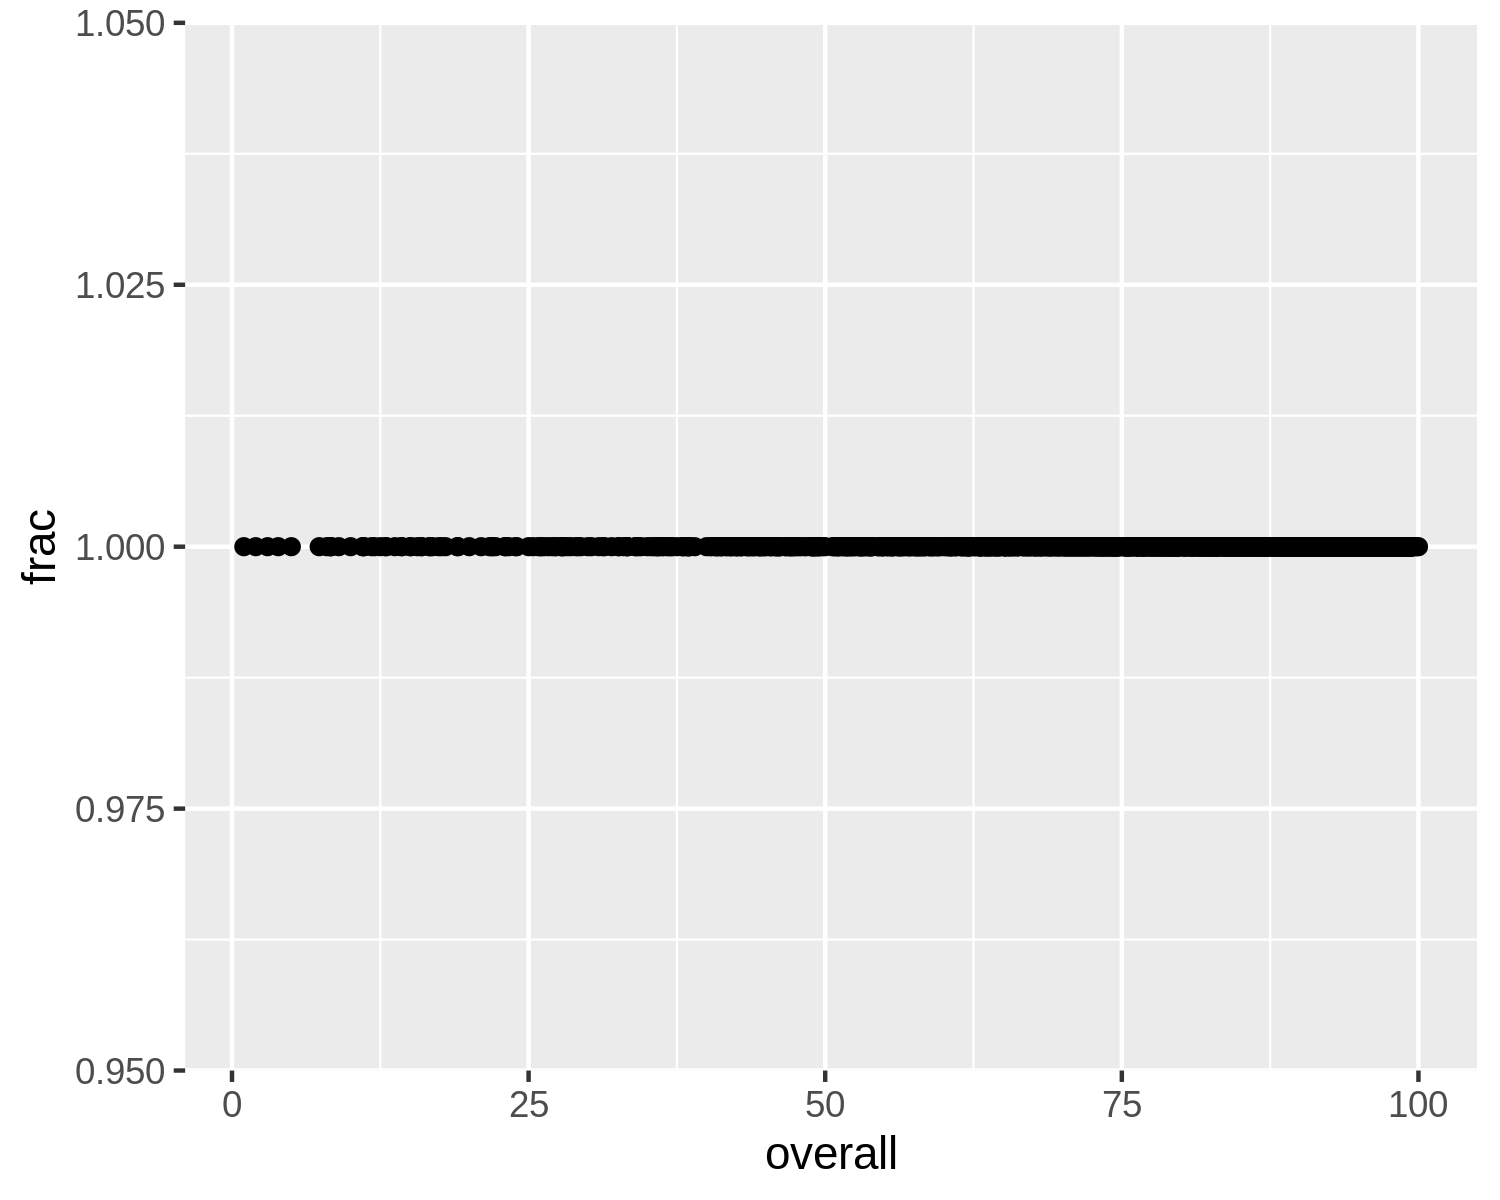

In [23]:
p = ggplot(vaxdata3, aes(x = overall, y =frac )) +
    geom_point() 
p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

 ![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [ ]:
no, it's below! 